In [272]:
import pandas as pd  
import numpy as np 
from scipy.stats import uniform  
import statsmodels.api as sm  
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt
import seaborn as sns
import difflib as dfl
from pandasql import sqldf
from pandas import read_excel

In [273]:
coaches = pd.read_csv("Coaches8.csv")

coachesdf = pd.DataFrame(coaches)

print(coachesdf)

                    School Conference               Coach SchoolPay TotalPay  \
0                Air Force   Mt. West        Troy Calhoun    885000   885000   
1                    Akron        MAC        Terry Bowden    411000   412500   
2                  Alabama        SEC          Nick Saban   8307000  8307000   
3    Alabama at Birmingham      C-USA          Bill Clark    900000   900000   
4        Appalachian State   Sun Belt   Scott Satterfield    712500   712500   
5                  Arizona     Pac-12        Kevin Sumlin   1600000  2000000   
6            Arizona State     Pac-12        Herm Edwards   2000000  2000000   
7                 Arkansas        SEC         Chad Morris   3500000  3500000   
8           Arkansas State   Sun Belt      Blake Anderson    825000   825000   
9                     Army       Ind.         Jeff Monken    932521   932521   
10                  Auburn        SEC         Gus Malzahn   6700000  6705656   
11              Ball State        MAC   

In [274]:
##Some Normalizations of Coaches
coachesdf['BonusPaid']=coachesdf['BonusPaid'].replace(['--'], 0)
coachesdf['SchoolPay']=coachesdf['SchoolPay'].replace(['--'], 0)
coachesdf['TotalPay']=coachesdf['TotalPay'].replace(['--'], 0)
coachesdf['Bonus']=coachesdf['Bonus'].replace(['--'], 0)
coachesdf['Buyout']=coachesdf['Buyout'].replace(['--'], 0)

coachesdf=coachesdf.astype({"TotalPay": int, "BonusPaid":int})
coachesdf['TrueSalary'] = coachesdf['TotalPay']-(coachesdf['BonusPaid'])


In [275]:
print(coachesdf.head())

                  School Conference              Coach SchoolPay  TotalPay  \
0              Air Force   Mt. West       Troy Calhoun    885000    885000   
1                  Akron        MAC       Terry Bowden    411000    412500   
2                Alabama        SEC         Nick Saban   8307000   8307000   
3  Alabama at Birmingham      C-USA         Bill Clark    900000    900000   
4      Appalachian State   Sun Belt  Scott Satterfield    712500    712500   

     Bonus  BonusPaid  AssistantPay    Buyout  TrueSalary  
0   247000          0             0         0      885000  
1   225000      50000             0    688500      362500  
2  1100000     500000             0  33600000     7807000  
3   950000     165471             0   3847500      734529  
4   295000     145000             0   2160417      567500  


Text(0,0.5,'Frequency of TotalSalary')

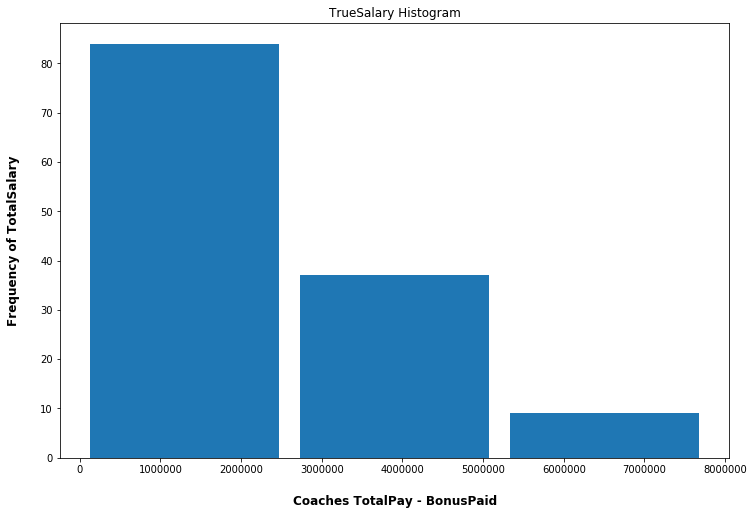

In [276]:
CoachesHist = coachesdf['TrueSalary'].hist(bins=3,grid=False, figsize=(12,8), zorder=2, rwidth=0.9) #Histogram of TrueSalary

CoachesHist.set_title("TrueSalary Histogram")
CoachesHist.set_xlabel("Coaches TotalPay - BonusPaid", labelpad=20, weight='bold', size=12)
CoachesHist.set_ylabel("Frequency of TotalSalary", labelpad=20, weight='bold', size=12)

In [277]:
print(coachesdf.groupby('Conference')['TrueSalary'].mean().nlargest(5))

Conference
SEC        4.422027e+06
Big Ten    4.154371e+06
Big 12     3.503080e+06
ACC        3.285946e+06
Pac-12     2.804606e+06
Name: TrueSalary, dtype: float64


In [278]:
coachesdf['TrueSalary'].mean() ##PayOutMean

2222880.4384615384

In [279]:
ACCCoaches=coachesdf.loc[coachesdf['Conference']=='ACC']

ACCCoaches['TrueSalary'].mean() ##Mean of ACC Coaches

3285945.5

In [280]:
GradRate = pd.read_csv("GraduationSuccess.csv")

GradRateDF = pd.DataFrame(GradRate)

GradRateDF.fillna(0, inplace=True) #Replace NaNs

GradRateDF = GradRateDF.loc[GradRateDF['SPORT']=='MFB']

GradRateDF['SCL_NAME']=GradRateDF.rename(columns={'SCL_NAME':'Proper_School'},inplace=True)
print(GradRateDF) ##Dataframe of strictly football programs

      SCL_UNITID                                      Proper_School  \
1         100654                             Alabama A&M University   
18        100663                University of Alabama at Birmingham   
29        100724                           Alabama State University   
51        100751                              University of Alabama   
71        100858                                  Auburn University   
88        101480                      Jacksonville State University   
101       102049                                 Samford University   
106       102094                        University of South Alabama   
123       102368                                    Troy University   
133       104151                           Arizona State University   
148       104179                              University of Arizona   
184       105330                        Northern Arizona University   
206       106397               University of Arkansas, Fayetteville   
229   

In [281]:
stadiumdf = pd.read_html("http://en.wikipedia.org/wiki/List_of_American_football_stadiums_by_capacity",
                         index_col=1, attrs={"class":"wikitable"}, header=0)[0]
stadiumdf.head()
##From example

,Image,Capacity,City,State/Province,Home teams,Refs,Unnamed: 7
Stadium,,,,,,,
Michigan Stadium,NaN,107601,Ann Arbor,Michigan,Michigan Wolverines,[1],NaN
Beaver Stadium,NaN,106572,University Park,Pennsylvania,Penn State Nittany Lions,[2],NaN
Kyle Field,NaN,102733,College Station,Texas,Texas A&M Aggies,NaN,NaN
Neyland Stadium,NaN,102455,Knoxville,Tennessee,Tennessee Volunteers,[3],NaN
Tiger Stadium,NaN,102321,Baton Rouge,Louisiana,LSU Tigers,[4],NaN


In [282]:
nicknamesdf = pd.read_html("http://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_programs",
                          attrs={"class":"wikitable"}, header=0)[0]
##From example
nicknamesdf.head()

,Team,Nickname,City,State[1],CurrentConference,FormerConferences,FirstPlayed,JoinedFBS
0,Air Force,Falcons,Colorado Springs,Colorado,Mountain West,WAC,1955,NaN
1,Akron,Zips,Akron,Ohio,MAC,"OAC, MCC, OVC",1891,1987
2,Alabama,Crimson Tide,Tuscaloosa,Alabama,SEC,"SIAA, SoCon",1892,NaN
3,UAB,Blazers,Birmingham,Alabama,C-USA,NaN,1991,1999
4,Appalachian State,Mountaineers,Boone,North Carolina,Sun Belt,"NSC, SoCon",1928,2014[n 1]


In [283]:
nicknamesdf.iloc[:,0:3].head()

,Team,Nickname,City
0,Air Force,Falcons,Colorado Springs
1,Akron,Zips,Akron
2,Alabama,Crimson Tide,Tuscaloosa
3,UAB,Blazers,Birmingham
4,Appalachian State,Mountaineers,Boone


In [284]:
nicknamesdf=nicknamesdf.iloc[:,0:3]
stadiumdf.head()

,Image,Capacity,City,State/Province,Home teams,Refs,Unnamed: 7
Stadium,,,,,,,
Michigan Stadium,NaN,107601,Ann Arbor,Michigan,Michigan Wolverines,[1],NaN
Beaver Stadium,NaN,106572,University Park,Pennsylvania,Penn State Nittany Lions,[2],NaN
Kyle Field,NaN,102733,College Station,Texas,Texas A&M Aggies,NaN,NaN
Neyland Stadium,NaN,102455,Knoxville,Tennessee,Tennessee Volunteers,[3],NaN
Tiger Stadium,NaN,102321,Baton Rouge,Louisiana,LSU Tigers,[4],NaN


In [285]:
capacitydf=sqldf("""
    Select a.team, a.nickname, b.capacity,b.[home teams]
from  nicknamesdf a
join  stadiumdf b
on   a.city = b.city
"""
)

In [286]:
coachesdf=sqldf("""
    Select a.*, b.capacity
from  coachesdf a
join  capacitydf b
on   a.school = b.team
"""
)

In [287]:
coachesdf.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,TrueSalary,Capacity
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,0,0,0,885000,52480
1,Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500,362500,30000
2,Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500,362500,31000
3,Alabama,SEC,Nick Saban,8307000,8307000,1100000,500000,0,33600000,7807000,101821
4,Arizona,Pac-12,Kevin Sumlin,1600000,2000000,2025000,0,0,10000000,2000000,55675


In [288]:
recordsdf = pd.read_excel("2018_FBSRecords.xlsx")

recordsdf.head() ##2018 FBS Records

##Self made excel from NCAA.com

,Team,C_W,C_L,Ov_W,Ov_L,PF,PA
0,Clemson,8,0,15,0,664,197
1,Syracuse,6,2,10,3,523,351
2,North Carolina State,5,3,9,4,440,324
3,Boston College,4,4,7,5,384,308
4,Wake Forest,3,5,7,6,427,433


In [290]:
coachesdf=sqldf("""
    Select a.*, b.Ov_W as OverAllWins
from  coachesdf a
join  recordsdf b
on   a.school = b.team
"""
)

In [291]:
coachesdf

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,TrueSalary,Capacity,OverAllWins
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,0,0,0,885000,52480,5
1,Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500,362500,30000,4
2,Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500,362500,31000,4
3,Alabama,SEC,Nick Saban,8307000,8307000,1100000,500000,0,33600000,7807000,101821,14
4,Arizona,Pac-12,Kevin Sumlin,1600000,2000000,2025000,0,0,10000000,2000000,55675,5
5,Arizona State,Pac-12,Herm Edwards,2000000,2000000,3010000,0,0,8166667,2000000,65870,7
6,Arkansas,SEC,Chad Morris,3500000,3500000,1000000,0,0,12500000,3500000,76212,2
7,Arkansas State,Sun Belt,Blake Anderson,825000,825000,185000,25000,0,300000,800000,30964,8
8,Army,Ind.,Jeff Monken,932521,932521,0,0,0,0,932521,40000,11
9,Auburn,SEC,Gus Malzahn,6700000,6705656,1400000,375000,0,32143750,6330656,87451,8


In [292]:
GSRtoCoaches = coachesdf.School.apply(dfl.get_close_matches, args=(GradRateDF.Proper_School,1,0.2)) ##GSR Rates

In [293]:
coachesdf=pd.concat([coachesdf,GSRtoCoaches.apply(lambda x: x[0] if len(x)>0 else np.nan)],axis=1)

In [294]:
coachesdf.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,TrueSalary,Capacity,OverAllWins,School
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,0,0,0,885000,52480,5,U.S. Air Force Academy
1,Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500,362500,30000,4,University of Akron
2,Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500,362500,31000,4,University of Akron
3,Alabama,SEC,Nick Saban,8307000,8307000,1100000,500000,0,33600000,7807000,101821,14,University of Alabama
4,Arizona,Pac-12,Kevin Sumlin,1600000,2000000,2025000,0,0,10000000,2000000,55675,5,University of Arizona


In [295]:
coachesdf=sqldf("""
    Select a.*, b.SCL_PRIVATE,b.GSR
from  coachesdf a
join  GradRateDF b
on   a.School = b.Proper_School
"""
)

In [296]:
coachesdf

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,TrueSalary,Capacity,OverAllWins,SCL_PRIVATE,GSR
0,U.S. Air Force Academy,Mt. West,Troy Calhoun,885000,885000,247000,0,0,0,885000,52480,5,0,77.0
1,University of Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500,362500,30000,4,0,72.0
2,University of Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500,362500,31000,4,0,72.0
3,University of Alabama,SEC,Nick Saban,8307000,8307000,1100000,500000,0,33600000,7807000,101821,14,0,84.0
4,University of Arizona,Pac-12,Kevin Sumlin,1600000,2000000,2025000,0,0,10000000,2000000,55675,5,0,76.0
5,Arizona State University,Pac-12,Herm Edwards,2000000,2000000,3010000,0,0,8166667,2000000,65870,7,0,73.0
6,Arkansas State University,SEC,Chad Morris,3500000,3500000,1000000,0,0,12500000,3500000,76212,2,0,83.0
7,Arkansas State University,Sun Belt,Blake Anderson,825000,825000,185000,25000,0,300000,800000,30964,8,0,83.0
8,U.S. Air Force Academy,Ind.,Jeff Monken,932521,932521,0,0,0,0,932521,40000,11,0,77.0
9,Auburn University,SEC,Gus Malzahn,6700000,6705656,1400000,375000,0,32143750,6330656,87451,8,0,72.0


In [304]:
NormCoachesDF=sqldf("""
    select School, Conference, Coach, SchoolPay, cast(TotalPay as float) as TotalPay,     
    cast(TrueSalary as float) as TrueSalary,
    cast(Capacity as float) as Capacity,
    cast(OverAllWins as int) as OverAllWins,
    cast(GSR as float) as GSR,
    cast(SCL_PRIVATE as int) as Private
    from
    coachesdf
"""
)
##Normalization of datatypes

In [305]:
NormCoachesDF

,School,Conference,Coach,SchoolPay,TotalPay,TrueSalary,Capacity,OverAllWins,GSR,Private
0,U.S. Air Force Academy,Mt. West,Troy Calhoun,885000,885000.0,885000.0,52480.0,5,77.0,0
1,University of Akron,MAC,Terry Bowden,411000,412500.0,362500.0,30000.0,4,72.0,0
2,University of Akron,MAC,Terry Bowden,411000,412500.0,362500.0,31000.0,4,72.0,0
3,University of Alabama,SEC,Nick Saban,8307000,8307000.0,7807000.0,101821.0,14,84.0,0
4,University of Arizona,Pac-12,Kevin Sumlin,1600000,2000000.0,2000000.0,55675.0,5,76.0,0
5,Arizona State University,Pac-12,Herm Edwards,2000000,2000000.0,2000000.0,65870.0,7,73.0,0
6,Arkansas State University,SEC,Chad Morris,3500000,3500000.0,3500000.0,76212.0,2,83.0,0
7,Arkansas State University,Sun Belt,Blake Anderson,825000,825000.0,800000.0,30964.0,8,83.0,0
8,U.S. Air Force Academy,Ind.,Jeff Monken,932521,932521.0,932521.0,40000.0,11,77.0,0
9,Auburn University,SEC,Gus Malzahn,6700000,6705656.0,6330656.0,87451.0,8,72.0,0


In [311]:
all_reg_mod = sm.OLS.from_formula("TrueSalary ~ " + 
                                  "Capacity + " + 
                                  "OverAllWins + " + 
                                  "GSR + " + 
                                  "Private",
                             data=NormCoachesDF.dropna()).fit()
all_reg_mod.summary()

##First model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TrueSalary   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     29.18
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           1.72e-16
Time:                        17:00:09   Log-Likelihood:                -1763.9
No. Observations:                 114   AIC:                             3538.
Df Residuals:                     109   BIC:                             3552.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.533e+06   9.17e+05     -1.672      0.097   -3.35e+06    2.84e+05
Capacity       48.7624      6.100      7.994      0.000      36.672      60.853
OverAllWins  1.413e+05   4.49e+04      3.149      0.002    5.24e+04     2.3e+05
GSR          3882.2609   1.14e+04      0.342      0.733   -1.86e+04    2.64e+04
Private     -4.295e+05   3.75e+05     -1.146      0.254   -1.17e+06    3.13e+05
==============================================================================
Omnibus:                        2.445   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.044
Skew:                          -0.323   Prob(JB):                        0.360
Kurtosis:                       3.118   Cond. No.                     4.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [365]:
no_gsr_reg_mod = sm.OLS.from_formula("TrueSalary ~ " + \
                                  "Capacity + " + \
                                  "OverAllWins + " + \
                                  #"GSR + " + \
                                  "Private",
                             data=NormCoachesDF.dropna()).fit()
no_gsr_reg_mod.summary()

##Second model without GSR
##Adj. R raised

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TrueSalary   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     39.18
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           2.65e-17
Time:                        17:52:32   Log-Likelihood:                -1764.0
No. Observations:                 114   AIC:                             3536.
Df Residuals:                     110   BIC:                             3547.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -1.25e+06   3.94e+05     -3.176      0.002   -2.03e+06    -4.7e+05
Capacity       48.3644      5.964      8.110      0.000      36.546      60.183
OverAllWins  1.454e+05    4.3e+04      3.378      0.001    6.01e+04    2.31e+05
Private     -3.685e+05   3.28e+05     -1.123      0.264   -1.02e+06    2.82e+05
==============================================================================
Omnibus:                        2.343   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.310   Jarque-Bera (JB):                2.011
Skew:                          -0.324   Prob(JB):                        0.366
Kurtosis:                       3.067   Cond. No.                     2.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [367]:
privatePr_reg_mod = sm.OLS.from_formula("TrueSalary ~ " + \
                                  "Capacity + " + \
                                  "OverAllWins + " + \
                                  "Private + " + \
                                  "GSR",
                             data=NormCoachesDF.dropna()).fit()
privatePr_reg_mod.summary()

##Third reg model to flip private and GSR

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TrueSalary   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     29.18
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           1.72e-16
Time:                        17:53:57   Log-Likelihood:                -1763.9
No. Observations:                 114   AIC:                             3538.
Df Residuals:                     109   BIC:                             3552.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.533e+06   9.17e+05     -1.672      0.097   -3.35e+06    2.84e+05
Capacity       48.7624      6.100      7.994      0.000      36.672      60.853
OverAllWins  1.413e+05   4.49e+04      3.149      0.002    5.24e+04     2.3e+05
Private     -4.295e+05   3.75e+05     -1.146      0.254   -1.17e+06    3.13e+05
GSR          3882.2609   1.14e+04      0.342      0.733   -1.86e+04    2.64e+04
==============================================================================
Omnibus:                        2.445   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.044
Skew:                          -0.323   Prob(JB):                        0.360
Kurtosis:                       3.118   Cond. No.                     4.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [378]:
cap_reg_mod = sm.OLS.from_formula("TrueSalary ~ " + \
                                  "Capacity + " + \
                                 # "OverAllWins + " + \
                                  "Private + " + \
                                  "Conference",
                             data=NormCoachesDF.dropna()).fit()
cap_reg_mod.summary()

##Fourth reg model add conference/test with capacity and private variables

##With Private, Cap, Ov. W .74 R^2
##Without private .74 R^2
##Without Cap .70 R^2
##Without Ov.w .70 R^2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TrueSalary   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     19.71
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           2.22e-21
Time:                        18:00:02   Log-Likelihood:                -1736.6
No. Observations:                 114   AIC:                             3499.
Df Residuals:                     101   BIC:                             3535.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.888e+05   4.29e+05      0.441      0.661   -6.62e+05    1.04e+06
Conference[T.ACC]       1.618e+06   4.13e+05      3.922      0.000       8e+05    2.44e+06
Conference[T.Big 12]      1.5e+06   4.59e+05      3.267      0.001    5.89e+05    2.41e+06
Conference[T.Big Ten]    2.08e+06   4.08e+05      5.098      0.000    1.27e+06    2.89e+06
Conference[T.C-USA]    -5.226e+05   4.45e+05     -1.173      0.243   -1.41e+06    3.61e+05
Conference[T.Ind.]     -1.746e+05   6.76e+05     -0.258      0.797   -1.52e+06    1.17e+06
Conference[T.MAC]       -6.12e+05   4.87e+05     -1.256      0.212   -1.58e+06    3.55e+05
Conference[T.Mt. West] -3.863e+05   4.58e+05     -0.844      0.400   -1.29e+06    5.21e+05
Conference[T.Pac-12]    1.267e+06   4.29e+05      2.950      0.004    4.15e+05    2.12e+06
Conference[T.SEC]       1.937e+06   4.23e+05      4.583      0.000     1.1e+06    2.78e+06
Conference[T.Sun Belt] -7.183e+05   5.25e+05     -1.368      0.174   -1.76e+06    3.23e+05
Capacity                  27.1485      5.896      4.605      0.000      15.453      38.844
Private                -5.979e+05   2.84e+05     -2.107      0.038   -1.16e+06   -3.51e+04
==============================================================================
Omnibus:                        2.493   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                1.949
Skew:                           0.219   Prob(JB):                        0.377
Kurtosis:                       3.468   Cond. No.                     6.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [376]:
conf_reg_mod = sm.OLS.from_formula("TrueSalary ~ " + \
                                  "Capacity + " + \
                                  "OverAllWins + " + \
                                  #"GSR + " + \
                                  "Private + " + \
                                  "Conference",
                             data=NormCoachesDF.drop(columns="TotalPay").dropna()).fit()
conf_reg_mod.summary()

##Fifth reg model with conference 
## Best R-squared and Adj R
##Tested with and without GSR... Adj R rose by .002 without

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TrueSalary   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     21.89
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           1.21e-23
Time:                        17:58:17   Log-Likelihood:                -1728.6
No. Observations:                 114   AIC:                             3485.
Df Residuals:                     100   BIC:                             3524.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -4.8e+05   4.37e+05     -1.098      0.275   -1.35e+06    3.87e+05
Conference[T.ACC]       1.672e+06   3.87e+05      4.322      0.000    9.04e+05    2.44e+06
Conference[T.Big 12]    1.565e+06    4.3e+05      3.635      0.000    7.11e+05    2.42e+06
Conference[T.Big Ten]   2.171e+06   3.83e+05      5.669      0.000    1.41e+06    2.93e+06
Conference[T.C-USA]    -3.625e+05   4.19e+05     -0.865      0.389   -1.19e+06    4.69e+05
Conference[T.Ind.]     -4.003e+05   6.36e+05     -0.629      0.531   -1.66e+06    8.62e+05
Conference[T.MAC]      -4.432e+05   4.59e+05     -0.966      0.336   -1.35e+06    4.67e+05
Conference[T.Mt. West] -2.879e+05   4.29e+05     -0.670      0.504   -1.14e+06    5.64e+05
Conference[T.Pac-12]    1.228e+06   4.02e+05      3.052      0.003     4.3e+05    2.03e+06
Conference[T.SEC]       1.984e+06   3.96e+05      5.008      0.000     1.2e+06    2.77e+06
Conference[T.Sun Belt] -4.239e+05   4.98e+05     -0.851      0.397   -1.41e+06    5.64e+05
Capacity                  21.4964      5.712      3.763      0.000      10.164      32.829
OverAllWins             1.323e+05   3.41e+04      3.881      0.000    6.47e+04       2e+05
Private                -5.184e+05   2.67e+05     -1.945      0.055   -1.05e+06    1.05e+04
==============================================================================
Omnibus:                        2.215   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                1.925
Skew:                           0.003   Prob(JB):                        0.382
Kurtosis:                       3.637   Cond. No.                     6.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [346]:
Syracuse = NormCoachesDF[NormCoachesDF.School=="Syracuse University"]
Syracuse['Conference'] = 'ACC'
SyracusePredictSal = conf_reg_mod.predict(Syracuse)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [347]:
SyracusePredictSal
##Salary predicted for ACC/Dino of Syracuse 
##$3,055,447

89    3.055447e+06
dtype: float64

In [358]:
Syracuse.Conference = 'Big Ten'
BigTenPre = conf_reg_mod.predict(Syracuse)
BigTenPre
##$3,554,998

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


89    3.554998e+06
dtype: float64